# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [32]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [33]:
X = load_npz('x.npz')
y = np.load('y.npy')
print(len(X.data),23532*169 ,X.shape,len(X.indptr)) # 169 признаков, все численные
print(y.shape, np.sort(y), ) # бинарная классифицация


148920 3976908 (23532, 169) 23533
(23532,) [0 0 0 ... 1 1 1]


Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [35]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
%autoreload 2

from boosting import Boosting

### Проверка кода

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Iteration 10/50 - Train Loss: 0.3076, Train ROC-AUC: 0.9998
Iteration 11/50 - Train Loss: 0.3020, Train ROC-AUC: 0.9998
Iteration 12/50 - Train Loss: 0.2973, Train ROC-AUC: 0.9998
Iteration 13/50 - Train Loss: 0.2933, Train ROC-AUC: 0.9998
Iteration 14/50 - Train Loss: 0.2898, Train ROC-AUC: 0.9998
Iteration 15/50 - Train Loss: 0.2867, Train ROC-AUC: 0.9998
Iteration 16/50 - Train Loss: 0.2840, Train ROC-AUC: 0.9998
Iteration 17/50 - Train Loss: 0.2816, Train ROC-A

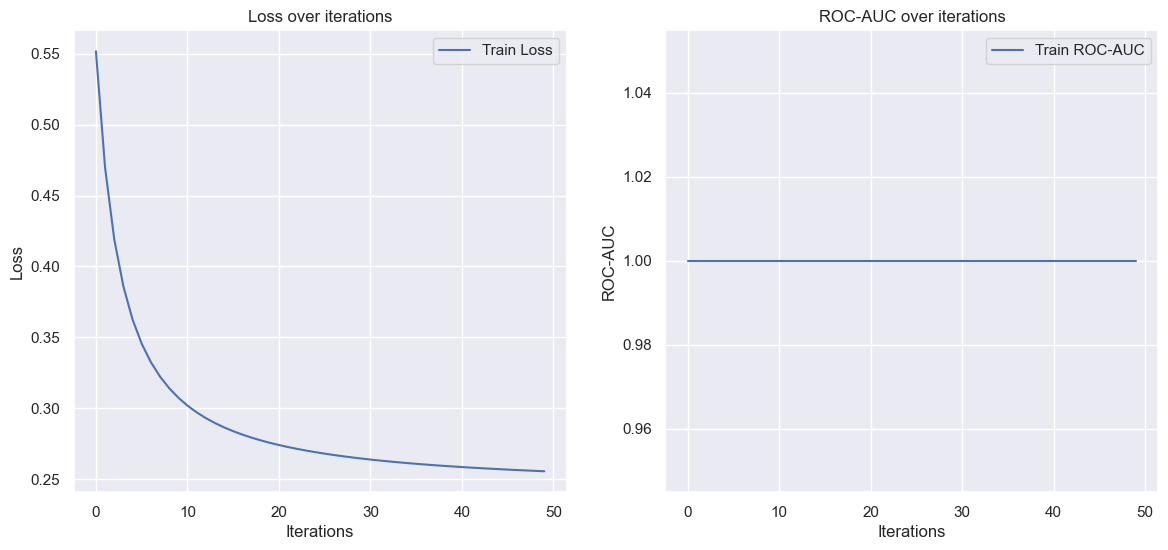

Train ROC-AUC 0.9998
Valid ROC-AUC 0.8816
Test ROC-AUC 0.8754


In [37]:
boosting = Boosting(n_estimators=50)

boosting.fit(X_train, y_train)
boosting.plot_history()


assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5544, Validation ROC-AUC: 0.9685
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4741, Validation ROC-AUC: 0.9795
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4246, Validation ROC-AUC: 0.9814
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9814
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3691, Validation ROC-AUC: 0.9823
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3523, Validation ROC-AUC: 0.9820
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9825
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3296, Validation ROC-AUC: 0.9826
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9825
I

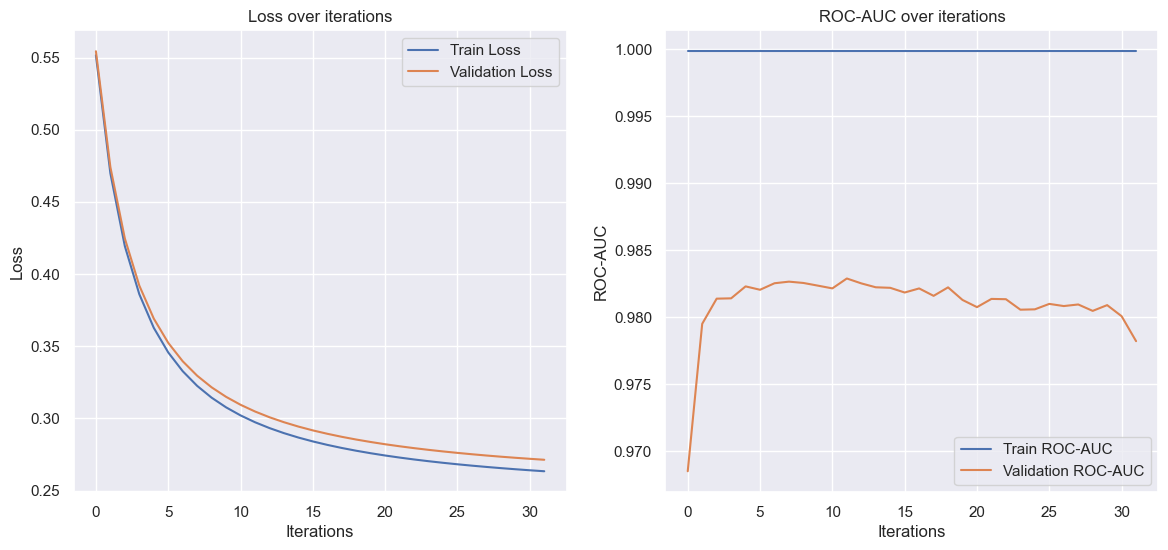

In [39]:
boosting = Boosting(n_estimators=50, learning_rate=0.1)
_, X_val, __, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

boosting.fit(X_train, y_train, X_val=X_val, y_val=y_val, early_stopping_rounds=30, plot=True)

Iteration 1/100 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5546, Validation ROC-AUC: 0.9680
Iteration 2/100 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4742, Validation ROC-AUC: 0.9793
Iteration 3/100 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4247, Validation ROC-AUC: 0.9812
Iteration 4/100 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3921, Validation ROC-AUC: 0.9814
Iteration 5/100 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3692, Validation ROC-AUC: 0.9826
Iteration 6/100 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3524, Validation ROC-AUC: 0.9820
Iteration 7/100 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9826
Iteration 8/100 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3296, Validation ROC-AUC: 0.9822
Iteration 9/100 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC:

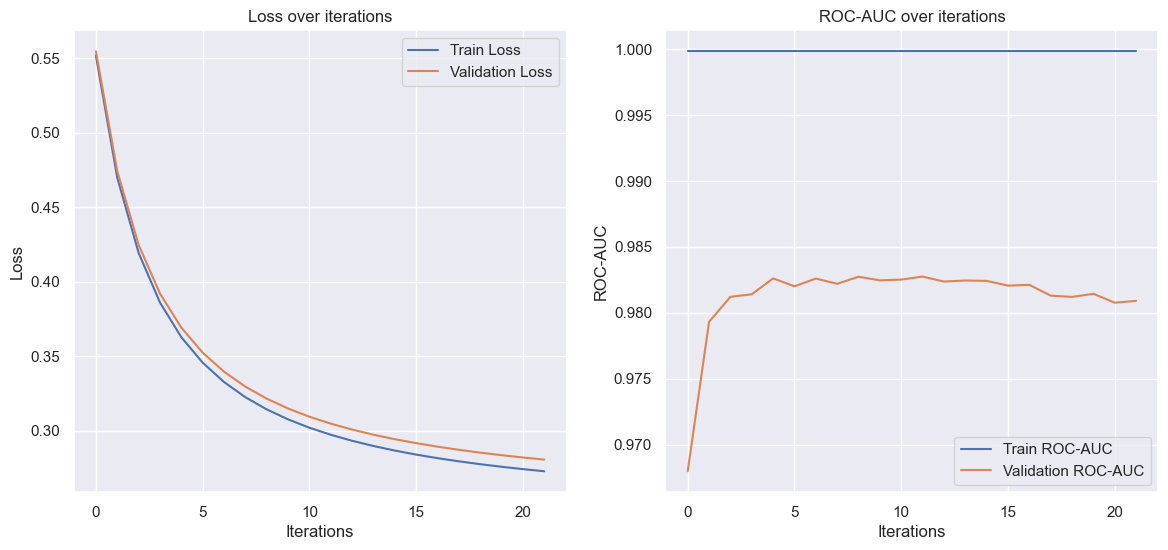

In [8]:
boosting = Boosting(n_estimators=100, learning_rate=0.1)
_, X_val, __, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

boosting.fit(X_train, y_train, X_val=X_val, y_val=y_val, early_stopping_rounds=20, plot=True)

Модель остановилась после 20 итераций, так как улучшений на валидационной выборке больше не происходило. Это позволяет избежать переобучения, сохраняя хорошее качество на валидации.
Ранняя остановка позволяет избежать переобучения, сохраняя оптимальное число итераций.


### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>Смысла скорее нет, чем есть, если данные линейные.

На таких задачах одиночная модель уже работает как надо, и бустинг просто избыточен.
Но если данные сложнее (не линейные зависимости или много шума), бустинг может помочь. Типа сглаживает косяки одиночных моделей за счёт ансамблирования.
На сложных данных — да.

Например, если линейная модель находит слабую зависимость, бустинг подтянет метрики. Особенно если шум, выбросы или что-то похожее.</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

Iteration 1/100 - Train Loss: 0.5718, Train ROC-AUC: 0.9587
Validation Loss: 0.5730, Validation ROC-AUC: 0.9481
Iteration 2/100 - Train Loss: 0.4981, Train ROC-AUC: 0.9583
Validation Loss: 0.4998, Validation ROC-AUC: 0.9475
Iteration 3/100 - Train Loss: 0.4502, Train ROC-AUC: 0.9577
Validation Loss: 0.4522, Validation ROC-AUC: 0.9469
Iteration 4/100 - Train Loss: 0.4171, Train ROC-AUC: 0.9576
Validation Loss: 0.4191, Validation ROC-AUC: 0.9468
Iteration 5/100 - Train Loss: 0.3931, Train ROC-AUC: 0.9572
Validation Loss: 0.3952, Validation ROC-AUC: 0.9463
Iteration 6/100 - Train Loss: 0.3748, Train ROC-AUC: 0.9571
Validation Loss: 0.3768, Validation ROC-AUC: 0.9463
Iteration 7/100 - Train Loss: 0.3603, Train ROC-AUC: 0.9571
Validation Loss: 0.3623, Validation ROC-AUC: 0.9462
Iteration 8/100 - Train Loss: 0.3487, Train ROC-AUC: 0.9570
Validation Loss: 0.3506, Validation ROC-AUC: 0.9462
Iteration 9/100 - Train Loss: 0.3392, Train ROC-AUC: 0.9568
Validation Loss: 0.3411, Validation ROC-AUC:

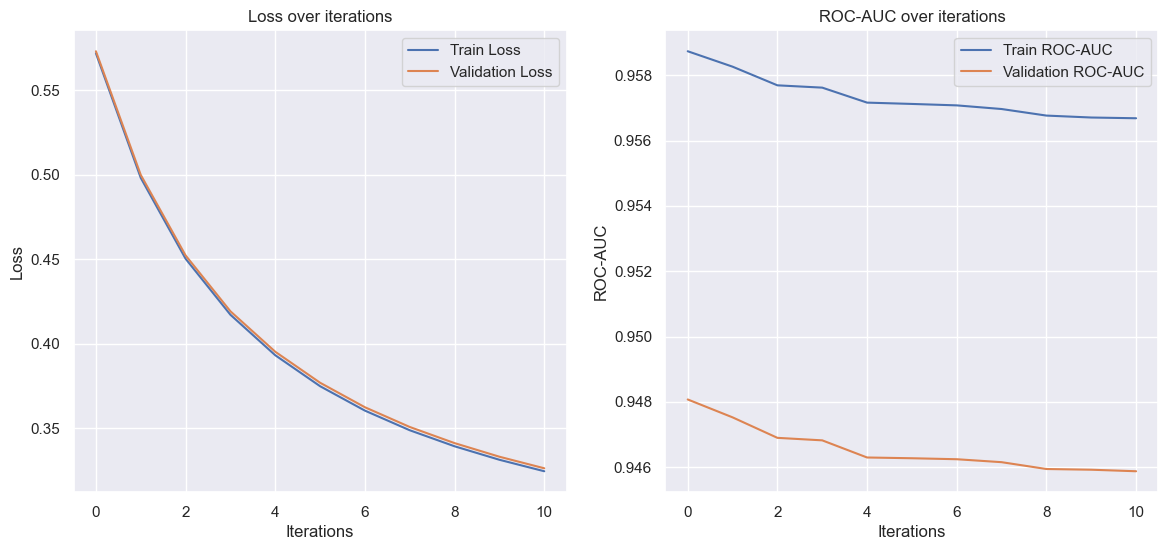

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import log_loss

boosting = Boosting(
    base_model_class=SGDRegressor,
    base_model_params={"max_iter": 100, "tol": 1e-3},
    n_estimators=100,
    learning_rate=0.1
)

boosting.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True, early_stopping_rounds=10)

boosting_train_loss = boosting.history["train_loss"]
boosting_val_loss = boosting.history["val_loss"]

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [41]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

train_proba = sgd.predict_proba(X_train)[:, 1]
val_proba = sgd.predict_proba(X_val)[:, 1]

sgd_train_loss = [log_loss(y_train, train_proba)]
sgd_val_loss = [log_loss(y_val, val_proba)]

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

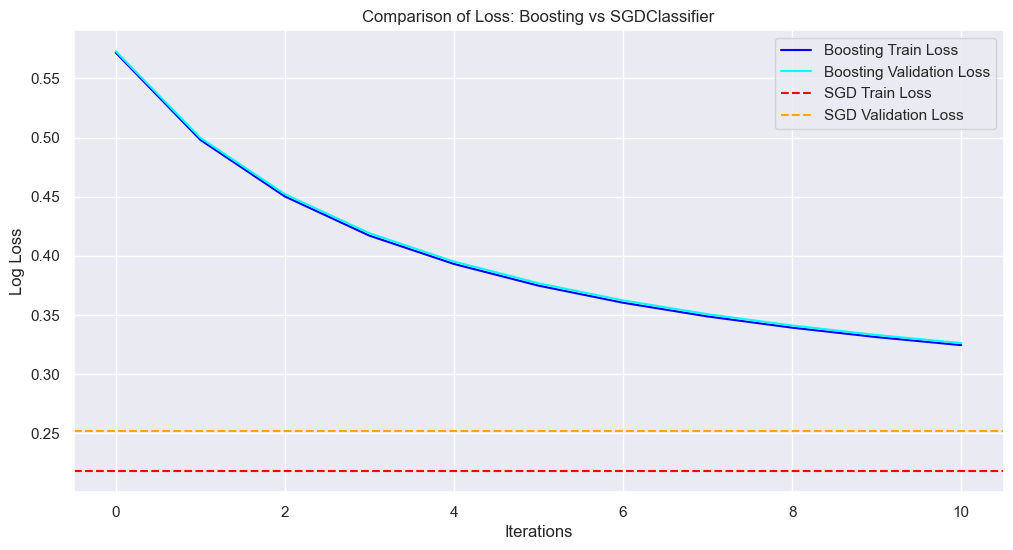

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(boosting_train_loss, label="Boosting Train Loss", color="blue")
plt.plot(boosting_val_loss, label="Boosting Validation Loss", color="cyan")

plt.axhline(y=sgd_train_loss[0], label="SGD Train Loss", color="red", linestyle="--")
plt.axhline(y=sgd_val_loss[0], label="SGD Validation Loss", color="orange", linestyle="--")

plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Comparison of Loss: Boosting vs SGDClassifier")
plt.show()

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>
Бустинг:

На тренировке логлосс красиво падает, а вот на валидации доходит до минимума и потом либо стоит, либо начинает ухудшаться. Ну, типичный случай переобучения, поэтому тут ранняя остановка реально спасает.
Валидационная метрика (ROC-AUC) тоже не радует. После нескольких итераций (здесь 11) модель перестаёт быть полезной, и дальше она только учит шум.

SGDClassifier:

Простая линейная модель вообще держится молодцом. Потери и метрики стабильно хорошие, без всяких переобучений.
Да, это одиночная модель, и ей не надо напрягаться, чтобы ансамблировать всякие фичи. Просто делает своё дело.

Итог:

Если данные линейные (что видно по результатам), бустинг особо ничего не даёт. Зачем брать кувалду, если можно обойтись молотком (в смысле, SGD)? Бустинг в этом случае только время тянет, а толку немного.</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>
Смещение:

На смещение бустрап влияет слабо — всё-таки это больше про архитектуру самой базовой модели. Но! Можно чуть улучшить ситуацию, если добавить больше слабых моделей в ансамбль. Чем больше моделей — тем лучше финальная точность.


Разброс:

Вот тут бустрап — прям топчик. Благодаря выборке случайных подвыборок модельки начинают меньше коррелировать друг с другом. А это значит, что итоговый ансамбль становится устойчивее к шуму и случайностям. Короче, с разбросом справляемся на ура.


Главная фишка бустрапа — разнообразие. Ансамбль становится разношерстным, что помогает справляться с переобучением. 

</font>

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5544, Validation ROC-AUC: 0.9691
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4742, Validation ROC-AUC: 0.9780
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4247, Validation ROC-AUC: 0.9805
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9808
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3691, Validation ROC-AUC: 0.9818
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3523, Validation ROC-AUC: 0.9816
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9816
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3295, Validation ROC-AUC: 0.9818
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9824
I

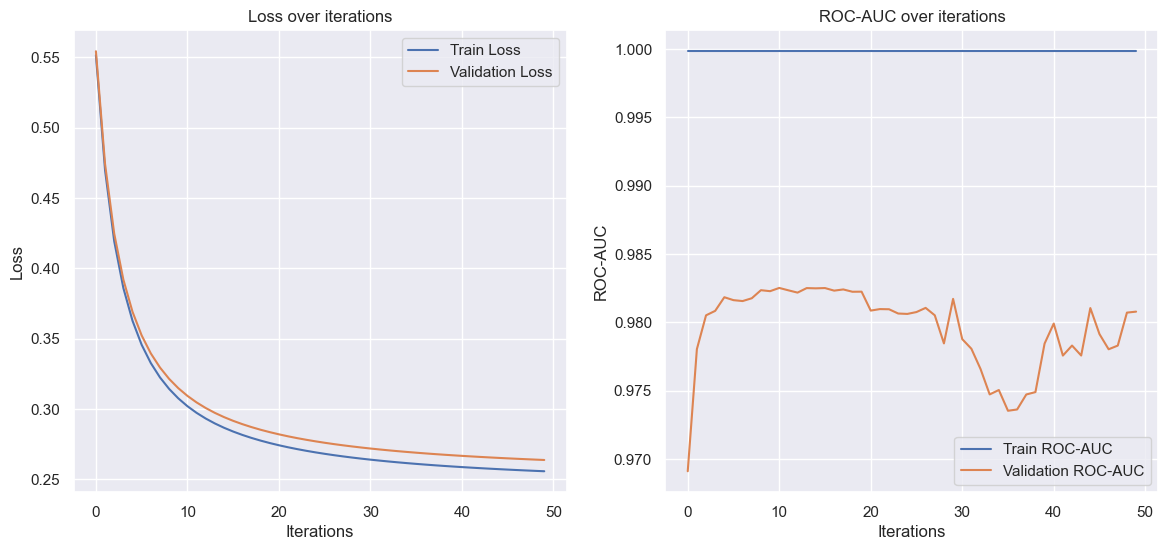

Iteration 1/50 - Train Loss: 0.5541, Train ROC-AUC: 0.9726
Validation Loss: 0.5571, Validation ROC-AUC: 0.9437
Iteration 2/50 - Train Loss: 0.4726, Train ROC-AUC: 0.9966
Validation Loss: 0.4770, Validation ROC-AUC: 0.9748
Iteration 3/50 - Train Loss: 0.4221, Train ROC-AUC: 0.9990
Validation Loss: 0.4275, Validation ROC-AUC: 0.9774
Iteration 4/50 - Train Loss: 0.3886, Train ROC-AUC: 0.9994
Validation Loss: 0.3943, Validation ROC-AUC: 0.9808
Iteration 5/50 - Train Loss: 0.3650, Train ROC-AUC: 0.9996
Validation Loss: 0.3711, Validation ROC-AUC: 0.9806
Iteration 6/50 - Train Loss: 0.3476, Train ROC-AUC: 0.9997
Validation Loss: 0.3539, Validation ROC-AUC: 0.9833
Iteration 7/50 - Train Loss: 0.3344, Train ROC-AUC: 0.9997
Validation Loss: 0.3409, Validation ROC-AUC: 0.9825
Iteration 8/50 - Train Loss: 0.3241, Train ROC-AUC: 0.9998
Validation Loss: 0.3306, Validation ROC-AUC: 0.9838
Iteration 9/50 - Train Loss: 0.3157, Train ROC-AUC: 0.9998
Validation Loss: 0.3223, Validation ROC-AUC: 0.9846
I

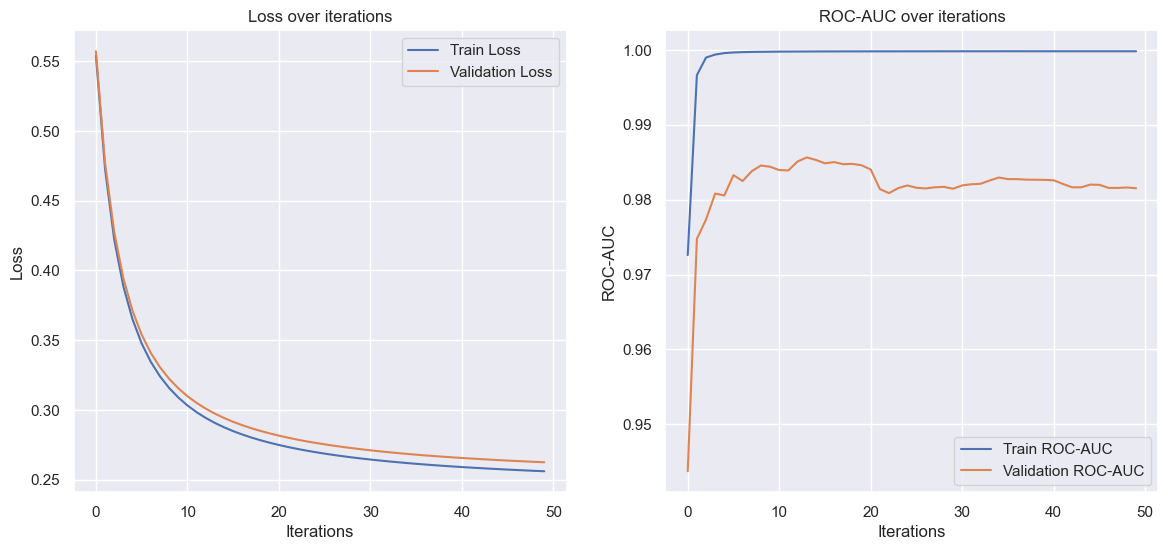

Iteration 1/50 - Train Loss: 0.5603, Train ROC-AUC: 0.9011
Validation Loss: 0.5624, Validation ROC-AUC: 0.8820
Iteration 2/50 - Train Loss: 0.4814, Train ROC-AUC: 0.9621
Validation Loss: 0.4844, Validation ROC-AUC: 0.9446
Iteration 3/50 - Train Loss: 0.4316, Train ROC-AUC: 0.9741
Validation Loss: 0.4355, Validation ROC-AUC: 0.9579
Iteration 4/50 - Train Loss: 0.3976, Train ROC-AUC: 0.9805
Validation Loss: 0.4016, Validation ROC-AUC: 0.9656
Iteration 5/50 - Train Loss: 0.3736, Train ROC-AUC: 0.9847
Validation Loss: 0.3779, Validation ROC-AUC: 0.9704
Iteration 6/50 - Train Loss: 0.3556, Train ROC-AUC: 0.9879
Validation Loss: 0.3599, Validation ROC-AUC: 0.9719
Iteration 7/50 - Train Loss: 0.3419, Train ROC-AUC: 0.9895
Validation Loss: 0.3462, Validation ROC-AUC: 0.9720
Iteration 8/50 - Train Loss: 0.3307, Train ROC-AUC: 0.9908
Validation Loss: 0.3351, Validation ROC-AUC: 0.9724
Iteration 9/50 - Train Loss: 0.3219, Train ROC-AUC: 0.9919
Validation Loss: 0.3264, Validation ROC-AUC: 0.9727
I

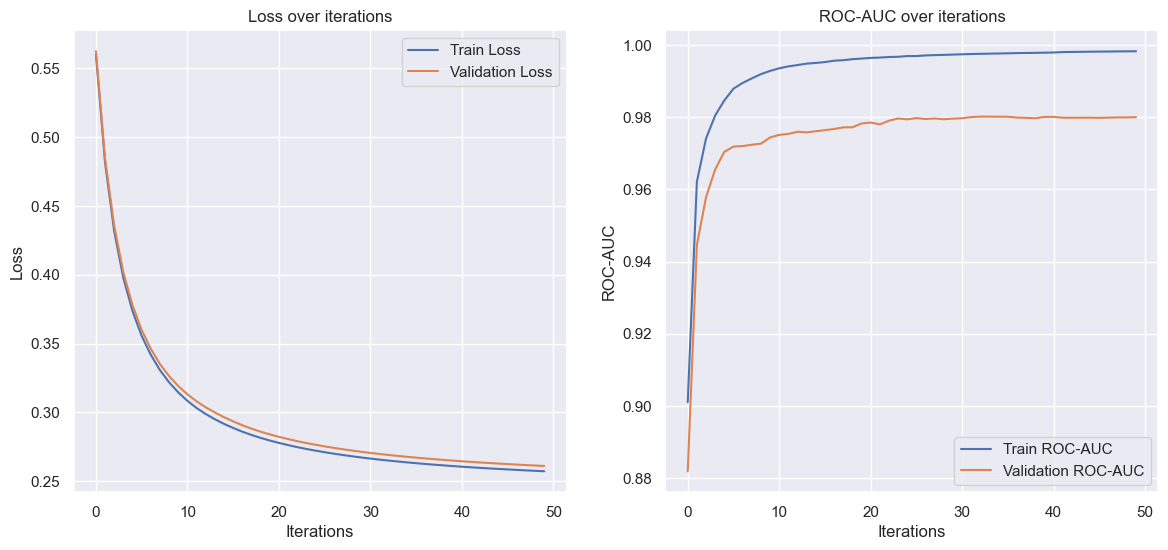

In [53]:
from sklearn.tree import DecisionTreeRegressor

boosting_no_bootstrap = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    subsample=1.0,
    bootstrap_type=None
)
boosting_no_bootstrap.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)

boosting_bernoulli = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    subsample=0.8,
    bootstrap_type="Bernoulli"
)
boosting_bernoulli.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)

boosting_bayesian = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    subsample=0.8,
    bagging_temperature=2.0,
    bootstrap_type="Bayesian"
)
boosting_bayesian.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)


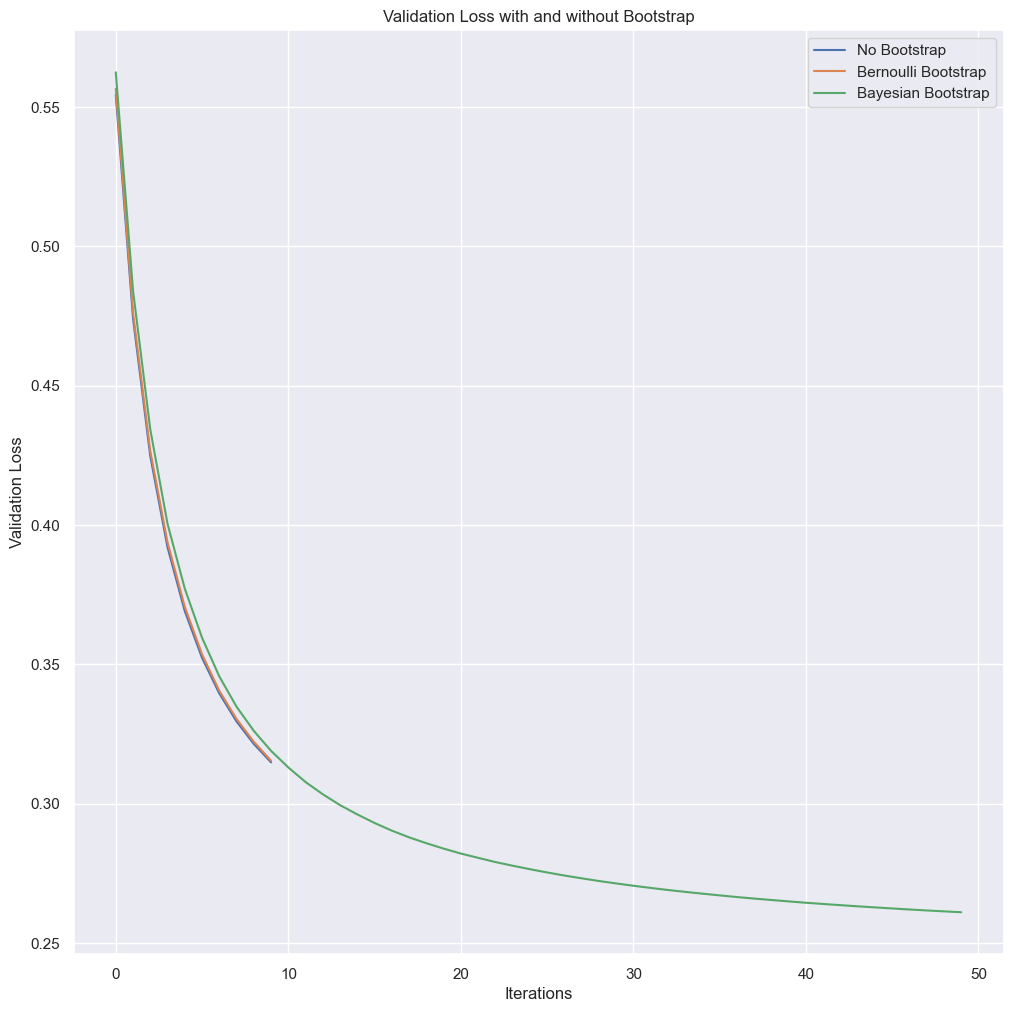

In [51]:
plt.figure(figsize=(12, 12))
plt.plot(boosting_no_bootstrap.history["val_loss"], label="No Bootstrap")
plt.plot(boosting_bernoulli.history["val_loss"], label="Bernoulli Bootstrap")
plt.plot(boosting_bayesian.history["val_loss"], label="Bayesian Bootstrap")
plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.legend()
plt.title("Validation Loss with and without Bootstrap")
plt.show()

Если говорить про различая про графики ф.п. и аук рока, видно, что без будстрапа и с бервнулевским качество не сильно отличается (хоть и отличаются в сторону бернули). А Если говорить про баесовский, то этот вариант показывает чуть более быстрое снижение функции потерь и хорошее качество, благодаря взвешиванию объектов, что может быть полезным в задачах с большим разбросом в важности объектов.

Итог: Все подходы работают эффективно, но баесовскией бустрап может быть полезен, если в данных есть значительные различия в важности объектов.

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5545, Validation ROC-AUC: 0.9680
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4742, Validation ROC-AUC: 0.9793
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4247, Validation ROC-AUC: 0.9804
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9814
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3691, Validation ROC-AUC: 0.9827
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3524, Validation ROC-AUC: 0.9824
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9826
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3295, Validation ROC-AUC: 0.9821
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9828
I

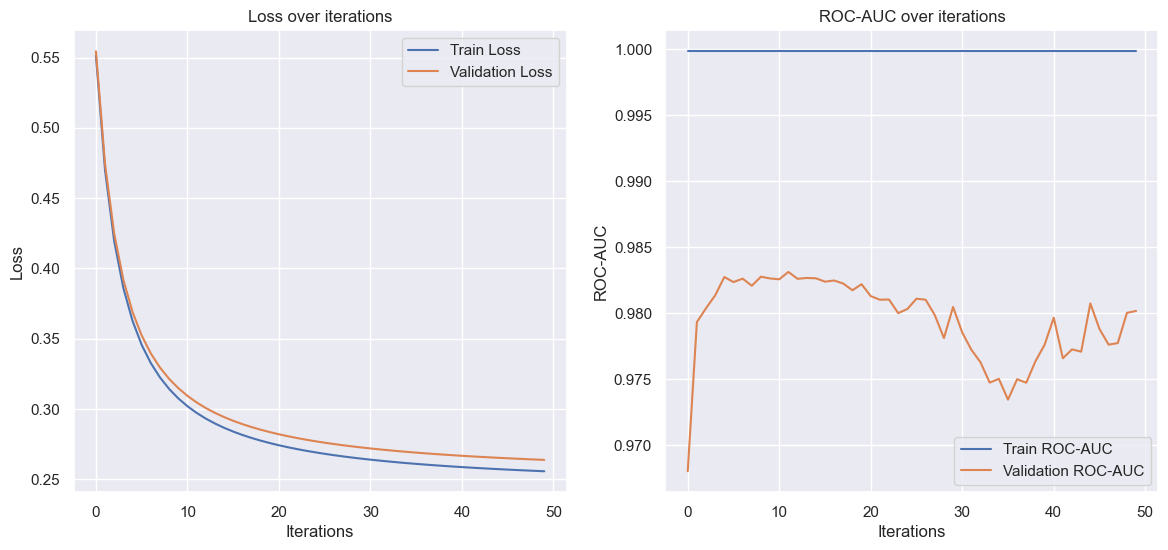

ValueError: Number of labels=18825 does not match number of samples=7529

In [56]:

boosting_no_goss = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    goss=False
)

boosting_goss_small_k = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    goss=True,
    goss_k=0.1,
    subsample_for_small_gradients=0.3
)

boosting_goss_large_k = Boosting(
    base_model_class=DecisionTreeRegressor,
    n_estimators=50,
    learning_rate=0.1,
    goss=True,
    goss_k=0.3,
    subsample_for_small_gradients=0.3
)

boosting_no_goss.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)
boosting_goss_small_k.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)
boosting_goss_large_k.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)



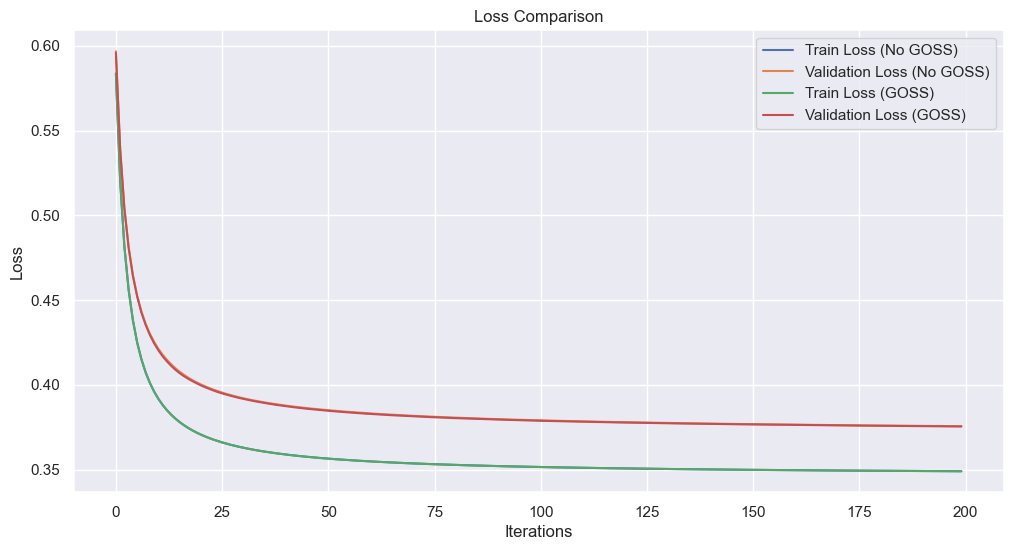

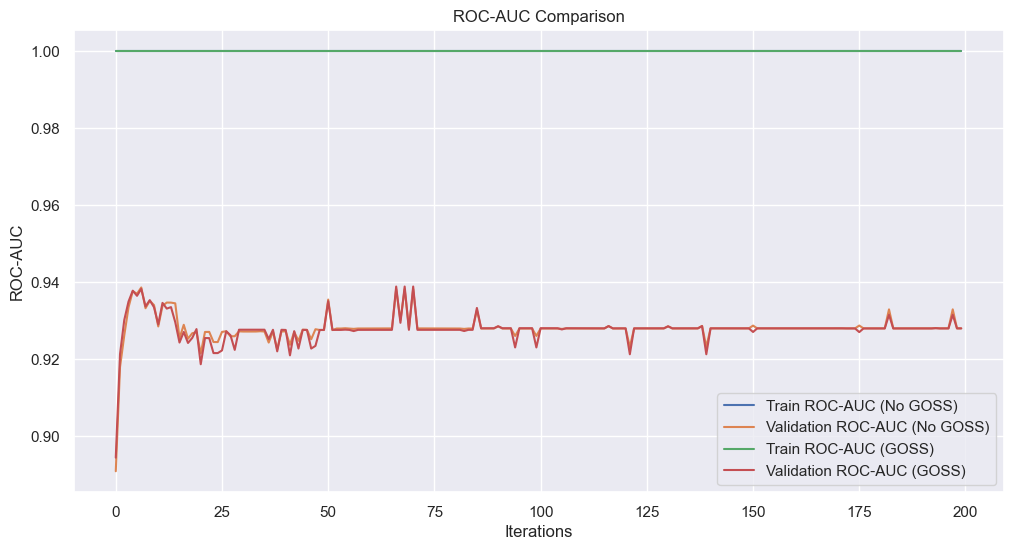

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>Квантизация превращает значения в бины, то есть переводит их в категории. Это круто, потому что выбросы перестают быть экстремальными значениями, они просто попадают в крайние бины. Наны, кстати, тоже можно запихнуть в отдельный бин, если захотеть. Таким образом, мы "сглаживаем" влияние шумных или отсутствующих данных на модель. </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>В принципе, можно. Если в данных нет строгих условий, то любой placeholder сойдёт. Только нельзя переборщить с экстремальностью, например, -1e32 — это уж слишком. Лучше выбирать значение, которое не пересекается с реальными данными. Если у нас, например, все фичи положительные, то -1 вполне ок. Главное, не забывай: модель может начать использовать такие значения как признак (особенно если у тебя бустинг), так что, возможно, лучше их явно обработать или закодировать. </font>

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5545, Validation ROC-AUC: 0.9683
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4742, Validation ROC-AUC: 0.9792
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4247, Validation ROC-AUC: 0.9809
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9812
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3692, Validation ROC-AUC: 0.9823
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3524, Validation ROC-AUC: 0.9820
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9820
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3296, Validation ROC-AUC: 0.9822
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9828
I

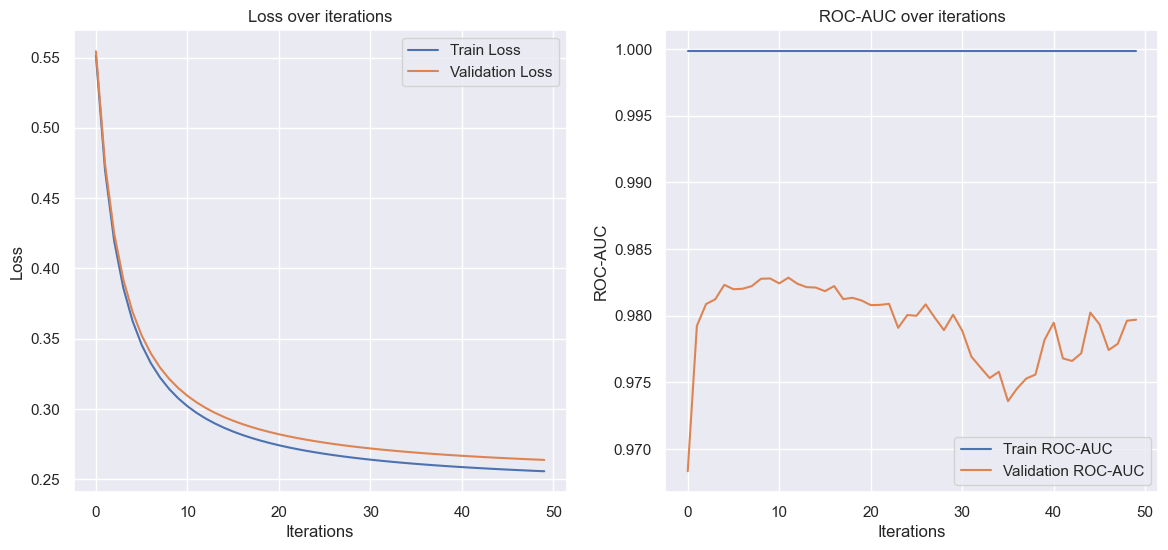

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5545, Validation ROC-AUC: 0.9692
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4741, Validation ROC-AUC: 0.9783
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4246, Validation ROC-AUC: 0.9807
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9812
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3691, Validation ROC-AUC: 0.9821
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3523, Validation ROC-AUC: 0.9817
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9818
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3295, Validation ROC-AUC: 0.9821
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9829
I

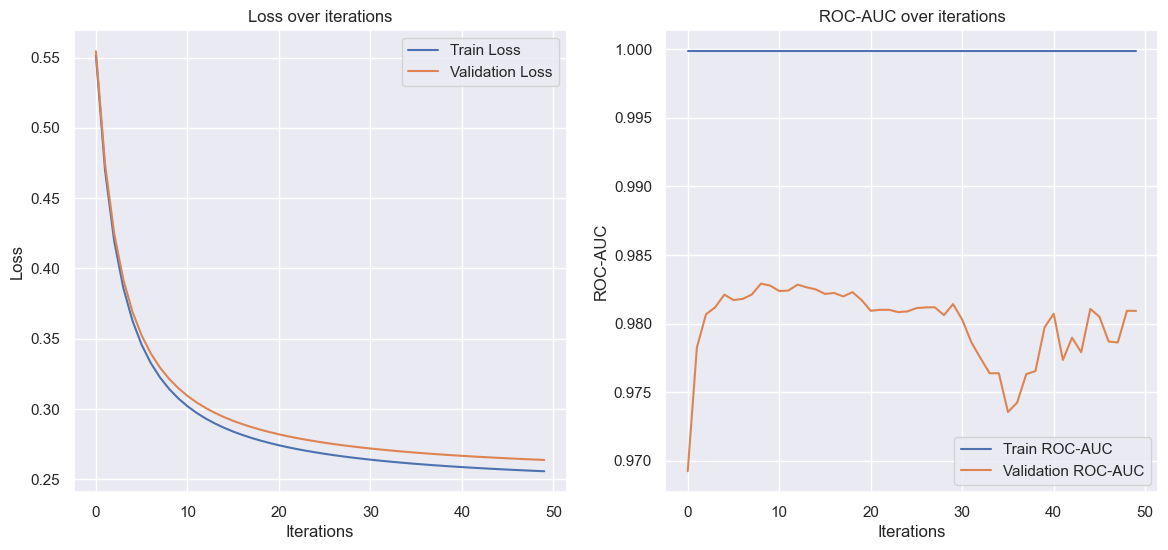

Iteration 1/50 - Train Loss: 0.5516, Train ROC-AUC: 0.9998
Validation Loss: 0.5545, Validation ROC-AUC: 0.9684
Iteration 2/50 - Train Loss: 0.4698, Train ROC-AUC: 0.9998
Validation Loss: 0.4742, Validation ROC-AUC: 0.9781
Iteration 3/50 - Train Loss: 0.4193, Train ROC-AUC: 0.9998
Validation Loss: 0.4247, Validation ROC-AUC: 0.9810
Iteration 4/50 - Train Loss: 0.3860, Train ROC-AUC: 0.9998
Validation Loss: 0.3920, Validation ROC-AUC: 0.9809
Iteration 5/50 - Train Loss: 0.3627, Train ROC-AUC: 0.9998
Validation Loss: 0.3691, Validation ROC-AUC: 0.9824
Iteration 6/50 - Train Loss: 0.3457, Train ROC-AUC: 0.9998
Validation Loss: 0.3524, Validation ROC-AUC: 0.9815
Iteration 7/50 - Train Loss: 0.3327, Train ROC-AUC: 0.9998
Validation Loss: 0.3396, Validation ROC-AUC: 0.9820
Iteration 8/50 - Train Loss: 0.3225, Train ROC-AUC: 0.9998
Validation Loss: 0.3296, Validation ROC-AUC: 0.9822
Iteration 9/50 - Train Loss: 0.3143, Train ROC-AUC: 0.9998
Validation Loss: 0.3215, Validation ROC-AUC: 0.9828
I

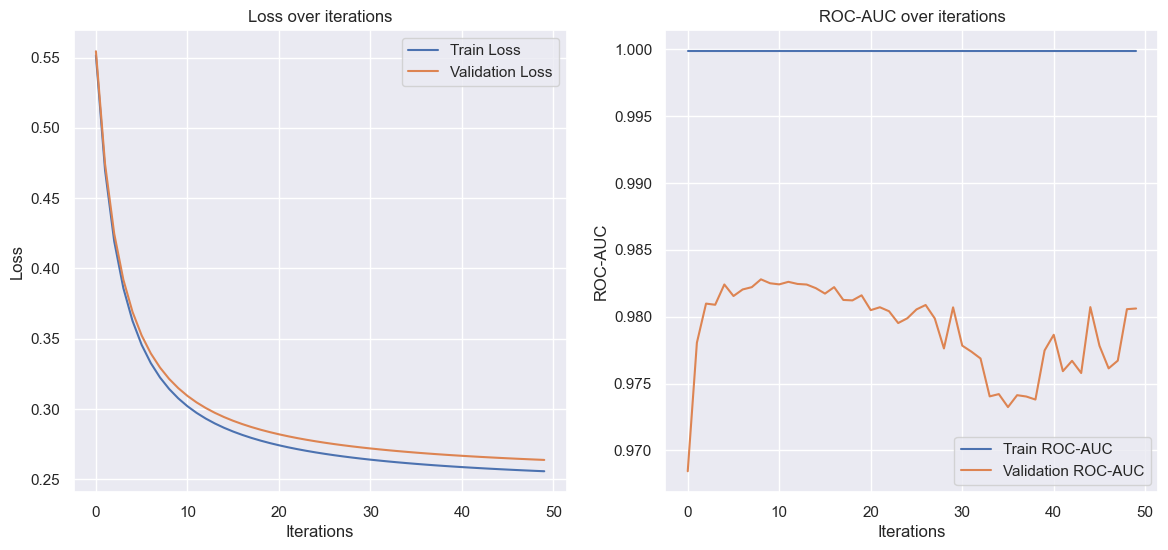

In [89]:
boosting_model = Boosting(
    n_estimators=50, 
    learning_rate=0.1, 
)
boosting_model_uniform = Boosting(
    n_estimators=50, 
    learning_rate=0.1, 
    quantization_type="Uniform",
    nbins=100
)
boosting_model_quantile = Boosting(
    n_estimators=50, 
    learning_rate=0.1, 
    quantization_type="Quantile",
    nbins=100
)

boosting_model.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)
boosting_model_uniform.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)
boosting_model_quantile.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=True)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

### Бонус. Квантизация (1.5 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="Piecewise"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше.

Покажите, какие признаки оказались самыми важными


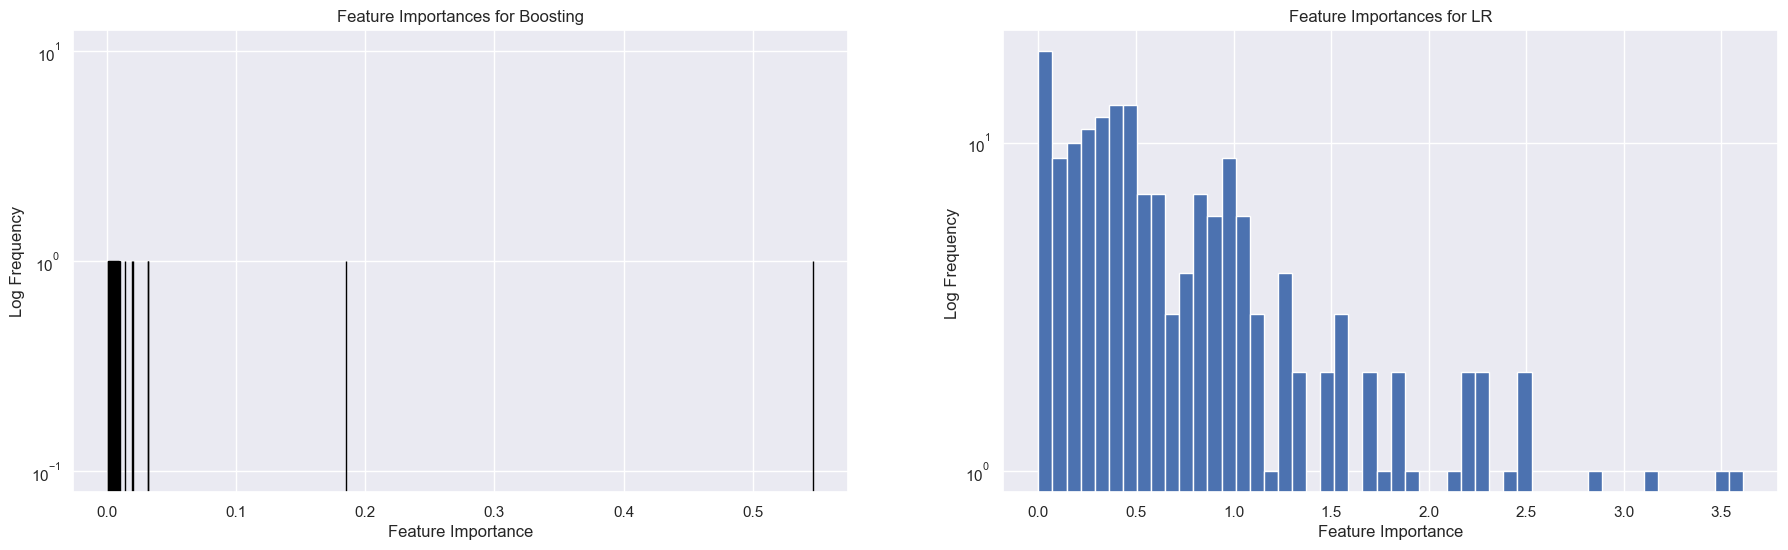

In [170]:
from sklearn.linear_model import LogisticRegression
feature_importances = boosting_model.feature_importances_
log_reg_fit = LogisticRegression().fit(X_train, y_train)
importance = np.abs(log_reg_fit.coef_[0])

plt.figure(figsize=(22, 6))

plt.subplot(1, 2, 1)
plt.hist(feature_importances, bins=50, log=True, edgecolor='black')
plt.title('Feature Importances for Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Log Frequency')

plt.subplot(1, 2, 2)
plt.hist(importance, bins=50, log=True)
plt.title('Feature Importances for LR')
plt.xlabel('Feature Importance')
plt.ylabel('Log Frequency ')

plt.show()

Можно заметить, что в датасете действительно много признаков, которые практически не влияют на целевую переменную — их важность околонулевая. Благодаря этому мы можем существенно уменьшить количество признаков, что потенциально ускорит обучение модели и снизит её сложность.

Если сравнить важность признаков, рассчитанную бустингом и логистической регрессией, видно, что они в чем-то схожи: оба метода выделяют определенные области, где признаки имеют высокую важность. Однако подходы моделей к оценке важности различаются: бустинг работает более категорично, выделяя явно важные признаки и игнорируя остальные, в то время как логистическая регрессия распределяет важности более равномерно, делая акцент на большем количестве фичей. Это наглядно показывает, как разные алгоритмы интерпретируют данные по-разному.

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [9]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 29.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

In [186]:
import optuna
from sklearn.metrics import roc_auc_score

def objective(study):
    
    n = study.suggest_int("n_estimators", 10, 200),
    stop = study.suggest_int("early_stopping_rounds", 3, 10),
    lr = study.suggest_float("learning_rate", 0.01, 0.5),
    sub = study.suggest_float("subsample", 0.5, 1.0),
    max_depth = study.suggest_int('max_depth', 1, 30) 
    
    model = Boosting(base_model_params={'max_depth': max_depth, 'random_state': 42}, 
                        n_estimators=n,
                        learning_rate=lr,
                        subsample=sub,
                        early_stopping_rounds = stop)
    
    model.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=False)
    
    val_predictions = model.predict_proba(X_val)
    
    val_score = roc_auc_score(y_val, val_predictions[:, 1])
    
    return val_score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print('Best trial:', study.best_trial.params)

[I 2024-12-22 23:53:36,211] A new study created in memory with name: no-name-68832a12-9534-4292-ab70-50aa01679361
[W 2024-12-22 23:53:36,213] Trial 0 failed with parameters: {'n_estimators': 70, 'early_stopping_rounds': 4, 'learning_rate': 0.010105479871605448, 'subsample': 0.8216005588222528, 'max_depth': 26} because of the following error: TypeError("'tuple' object cannot be interpreted as an integer").
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Temp\ipykernel_21252\3213801422.py", line 18, in objective
    model.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=False)
  File "c:\Users\User\Кирилл\МО\boosting.py", line 155, in fit
    for i in range( self.n_estimators):
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: 'tuple' object cannot be interpreted a

TypeError: 'tuple' object cannot be interpreted as an integer

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [130]:
from optuna.pruners import MedianPruner

study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///optuna_results.db",
    load_if_exists=True,
    pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=10)
)


[I 2024-12-22 21:37:19,778] A new study created in RDB with name: no-name-d713ceb3-22d0-4791-88f9-93bc68554455


In [146]:
import time

def objective(trial):
    start_time = time.time()
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)
    sub = trial.suggest_float("subsample", 0.5, 1.0)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds",3,10)

    model = Boosting(
        base_model_params= {"max_depth": max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=sub,
        early_stopping_rounds=early_stopping_rounds
    )
    model.fit(X_train, y_train, X_val=X_val, y_val=y_val, plot=False)

    val_predictions = model.predict_proba(X_val)[:, 1]
    val_score = roc_auc_score(y_val, val_predictions)

    # Сохраняем историю и время
    trial.set_user_attr("val_score", val_score)
    trial.set_user_attr("time_taken", time.time() - start_time)

    return val_score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print('Best trial:', study.best_trial.params)


[I 2024-12-22 22:16:24,257] A new study created in memory with name: no-name-c0582bf3-17e4-4ebc-9764-f09d954ed6e6


Iteration 1/45 - Train Loss: 0.5622, Train ROC-AUC: 0.9741
Validation Loss: 0.5639, Validation ROC-AUC: 0.9562
Iteration 2/45 - Train Loss: 0.4841, Train ROC-AUC: 0.9781
Validation Loss: 0.4865, Validation ROC-AUC: 0.9634
Iteration 3/45 - Train Loss: 0.4346, Train ROC-AUC: 0.9795
Validation Loss: 0.4374, Validation ROC-AUC: 0.9661
Iteration 4/45 - Train Loss: 0.4012, Train ROC-AUC: 0.9806
Validation Loss: 0.4043, Validation ROC-AUC: 0.9667
Iteration 5/45 - Train Loss: 0.3771, Train ROC-AUC: 0.9818
Validation Loss: 0.3804, Validation ROC-AUC: 0.9676
Iteration 6/45 - Train Loss: 0.3591, Train ROC-AUC: 0.9829
Validation Loss: 0.3626, Validation ROC-AUC: 0.9687
Iteration 7/45 - Train Loss: 0.3452, Train ROC-AUC: 0.9838
Validation Loss: 0.3488, Validation ROC-AUC: 0.9698
Iteration 8/45 - Train Loss: 0.3342, Train ROC-AUC: 0.9846
Validation Loss: 0.3378, Validation ROC-AUC: 0.9706
Iteration 9/45 - Train Loss: 0.3252, Train ROC-AUC: 0.9852
Validation Loss: 0.3288, Validation ROC-AUC: 0.9711
I

[I 2024-12-22 22:16:33,130] Trial 0 finished with value: 0.9733462329157277 and parameters: {'n_estimators': 45, 'max_depth': 10, 'learning_rate': 0.44656407327408015, 'subsample': 0.966837483863497, 'early_stopping_rounds': 4}. Best is trial 0 with value: 0.9733462329157277.


Iteration 45/45 - Train Loss: 0.2602, Train ROC-AUC: 0.9879
Validation Loss: 0.2634, Validation ROC-AUC: 0.9733
Iteration 1/62 - Train Loss: 0.5622, Train ROC-AUC: 0.9741
Validation Loss: 0.5638, Validation ROC-AUC: 0.9568
Iteration 2/62 - Train Loss: 0.4841, Train ROC-AUC: 0.9782
Validation Loss: 0.4863, Validation ROC-AUC: 0.9624
Iteration 3/62 - Train Loss: 0.4346, Train ROC-AUC: 0.9797
Validation Loss: 0.4373, Validation ROC-AUC: 0.9659
Iteration 4/62 - Train Loss: 0.4012, Train ROC-AUC: 0.9806
Validation Loss: 0.4041, Validation ROC-AUC: 0.9667
Iteration 5/62 - Train Loss: 0.3771, Train ROC-AUC: 0.9818
Validation Loss: 0.3803, Validation ROC-AUC: 0.9675
Iteration 6/62 - Train Loss: 0.3592, Train ROC-AUC: 0.9829
Validation Loss: 0.3625, Validation ROC-AUC: 0.9687
Iteration 7/62 - Train Loss: 0.3453, Train ROC-AUC: 0.9837
Validation Loss: 0.3488, Validation ROC-AUC: 0.9697
Iteration 8/62 - Train Loss: 0.3342, Train ROC-AUC: 0.9846
Validation Loss: 0.3378, Validation ROC-AUC: 0.9703


[I 2024-12-22 22:16:47,215] Trial 1 finished with value: 0.9726200111701995 and parameters: {'n_estimators': 62, 'max_depth': 10, 'learning_rate': 0.015171342801678648, 'subsample': 0.9749036143646648, 'early_stopping_rounds': 7}. Best is trial 0 with value: 0.9733462329157277.


Iteration 62/62 - Train Loss: 0.2553, Train ROC-AUC: 0.9881
Validation Loss: 0.2585, Validation ROC-AUC: 0.9726
Iteration 1/161 - Train Loss: 0.5622, Train ROC-AUC: 0.9743
Validation Loss: 0.5638, Validation ROC-AUC: 0.9574
Iteration 2/161 - Train Loss: 0.4841, Train ROC-AUC: 0.9782
Validation Loss: 0.4864, Validation ROC-AUC: 0.9635
Iteration 3/161 - Train Loss: 0.4346, Train ROC-AUC: 0.9796
Validation Loss: 0.4374, Validation ROC-AUC: 0.9661
Iteration 4/161 - Train Loss: 0.4012, Train ROC-AUC: 0.9806
Validation Loss: 0.4042, Validation ROC-AUC: 0.9668
Iteration 5/161 - Train Loss: 0.3772, Train ROC-AUC: 0.9819
Validation Loss: 0.3804, Validation ROC-AUC: 0.9678
Iteration 6/161 - Train Loss: 0.3592, Train ROC-AUC: 0.9830
Validation Loss: 0.3626, Validation ROC-AUC: 0.9690
Iteration 7/161 - Train Loss: 0.3453, Train ROC-AUC: 0.9839
Validation Loss: 0.3488, Validation ROC-AUC: 0.9699
Iteration 8/161 - Train Loss: 0.3342, Train ROC-AUC: 0.9846
Validation Loss: 0.3378, Validation ROC-AUC:

[I 2024-12-22 22:17:51,230] Trial 2 finished with value: 0.9728394258025256 and parameters: {'n_estimators': 161, 'max_depth': 10, 'learning_rate': 0.22981688904397296, 'subsample': 0.8074730787436184, 'early_stopping_rounds': 3}. Best is trial 0 with value: 0.9733462329157277.


Iteration 161/161 - Train Loss: 0.2474, Train ROC-AUC: 0.9884
Validation Loss: 0.2501, Validation ROC-AUC: 0.9728
Iteration 1/34 - Train Loss: 0.5669, Train ROC-AUC: 0.9493
Validation Loss: 0.5685, Validation ROC-AUC: 0.9393
Iteration 2/34 - Train Loss: 0.4905, Train ROC-AUC: 0.9552
Validation Loss: 0.4928, Validation ROC-AUC: 0.9450
Iteration 3/34 - Train Loss: 0.4414, Train ROC-AUC: 0.9586
Validation Loss: 0.4439, Validation ROC-AUC: 0.9485
Iteration 4/34 - Train Loss: 0.4079, Train ROC-AUC: 0.9599
Validation Loss: 0.4105, Validation ROC-AUC: 0.9499
Iteration 5/34 - Train Loss: 0.3838, Train ROC-AUC: 0.9611
Validation Loss: 0.3864, Validation ROC-AUC: 0.9510
Iteration 6/34 - Train Loss: 0.3657, Train ROC-AUC: 0.9623
Validation Loss: 0.3683, Validation ROC-AUC: 0.9521
Iteration 7/34 - Train Loss: 0.3516, Train ROC-AUC: 0.9630
Validation Loss: 0.3542, Validation ROC-AUC: 0.9530
Iteration 8/34 - Train Loss: 0.3404, Train ROC-AUC: 0.9643
Validation Loss: 0.3428, Validation ROC-AUC: 0.953

[I 2024-12-22 22:17:55,138] Trial 3 finished with value: 0.9582587230961539 and parameters: {'n_estimators': 34, 'max_depth': 6, 'learning_rate': 0.3547999446709926, 'subsample': 0.6446040814061513, 'early_stopping_rounds': 4}. Best is trial 0 with value: 0.9733462329157277.


Iteration 33/34 - Train Loss: 0.2692, Train ROC-AUC: 0.9689
Validation Loss: 0.2708, Validation ROC-AUC: 0.9582
Iteration 34/34 - Train Loss: 0.2685, Train ROC-AUC: 0.9690
Validation Loss: 0.2700, Validation ROC-AUC: 0.9583
Iteration 1/41 - Train Loss: 0.5699, Train ROC-AUC: 0.9323
Validation Loss: 0.5714, Validation ROC-AUC: 0.9220
Iteration 2/41 - Train Loss: 0.4945, Train ROC-AUC: 0.9390
Validation Loss: 0.4963, Validation ROC-AUC: 0.9309
Iteration 3/41 - Train Loss: 0.4458, Train ROC-AUC: 0.9421
Validation Loss: 0.4479, Validation ROC-AUC: 0.9334
Iteration 4/41 - Train Loss: 0.4120, Train ROC-AUC: 0.9445
Validation Loss: 0.4141, Validation ROC-AUC: 0.9359
Iteration 5/41 - Train Loss: 0.3876, Train ROC-AUC: 0.9473
Validation Loss: 0.3897, Validation ROC-AUC: 0.9388
Iteration 6/41 - Train Loss: 0.3692, Train ROC-AUC: 0.9498
Validation Loss: 0.3711, Validation ROC-AUC: 0.9413
Iteration 7/41 - Train Loss: 0.3549, Train ROC-AUC: 0.9505
Validation Loss: 0.3567, Validation ROC-AUC: 0.9421

[I 2024-12-22 22:17:59,440] Trial 4 finished with value: 0.9486160900888099 and parameters: {'n_estimators': 41, 'max_depth': 4, 'learning_rate': 0.0625421936949477, 'subsample': 0.8479839626998527, 'early_stopping_rounds': 10}. Best is trial 0 with value: 0.9733462329157277.


Iteration 41/41 - Train Loss: 0.2651, Train ROC-AUC: 0.9582
Validation Loss: 0.2659, Validation ROC-AUC: 0.9486
Iteration 1/126 - Train Loss: 0.5658, Train ROC-AUC: 0.9564
Validation Loss: 0.5672, Validation ROC-AUC: 0.9463
Iteration 2/126 - Train Loss: 0.4889, Train ROC-AUC: 0.9622
Validation Loss: 0.4912, Validation ROC-AUC: 0.9524
Iteration 3/126 - Train Loss: 0.4397, Train ROC-AUC: 0.9653
Validation Loss: 0.4423, Validation ROC-AUC: 0.9551
Iteration 4/126 - Train Loss: 0.4062, Train ROC-AUC: 0.9663
Validation Loss: 0.4089, Validation ROC-AUC: 0.9558
Iteration 5/126 - Train Loss: 0.3820, Train ROC-AUC: 0.9683
Validation Loss: 0.3848, Validation ROC-AUC: 0.9571
Iteration 6/126 - Train Loss: 0.3640, Train ROC-AUC: 0.9693
Validation Loss: 0.3668, Validation ROC-AUC: 0.9580
Iteration 7/126 - Train Loss: 0.3500, Train ROC-AUC: 0.9699
Validation Loss: 0.3528, Validation ROC-AUC: 0.9587
Iteration 8/126 - Train Loss: 0.3388, Train ROC-AUC: 0.9705
Validation Loss: 0.3416, Validation ROC-AUC:

[I 2024-12-22 22:18:32,196] Trial 5 finished with value: 0.9643364389451743 and parameters: {'n_estimators': 126, 'max_depth': 7, 'learning_rate': 0.019155698270797286, 'subsample': 0.9745579372248299, 'early_stopping_rounds': 9}. Best is trial 0 with value: 0.9733462329157277.


Iteration 126/126 - Train Loss: 0.2493, Train ROC-AUC: 0.9757
Validation Loss: 0.2506, Validation ROC-AUC: 0.9643
Iteration 1/106 - Train Loss: 0.5699, Train ROC-AUC: 0.9323
Validation Loss: 0.5714, Validation ROC-AUC: 0.9220
Iteration 2/106 - Train Loss: 0.4945, Train ROC-AUC: 0.9390
Validation Loss: 0.4963, Validation ROC-AUC: 0.9309
Iteration 3/106 - Train Loss: 0.4458, Train ROC-AUC: 0.9421
Validation Loss: 0.4479, Validation ROC-AUC: 0.9334
Iteration 4/106 - Train Loss: 0.4120, Train ROC-AUC: 0.9445
Validation Loss: 0.4141, Validation ROC-AUC: 0.9359
Iteration 5/106 - Train Loss: 0.3876, Train ROC-AUC: 0.9473
Validation Loss: 0.3897, Validation ROC-AUC: 0.9388
Iteration 6/106 - Train Loss: 0.3692, Train ROC-AUC: 0.9498
Validation Loss: 0.3711, Validation ROC-AUC: 0.9413
Iteration 7/106 - Train Loss: 0.3549, Train ROC-AUC: 0.9505
Validation Loss: 0.3567, Validation ROC-AUC: 0.9421
Iteration 8/106 - Train Loss: 0.3433, Train ROC-AUC: 0.9515
Validation Loss: 0.3450, Validation ROC-AU

[I 2024-12-22 22:18:52,098] Trial 6 finished with value: 0.9504259879017292 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.38937980244171294, 'subsample': 0.5028346665636423, 'early_stopping_rounds': 6}. Best is trial 0 with value: 0.9733462329157277.


Iteration 106/106 - Train Loss: 0.2513, Train ROC-AUC: 0.9600
Validation Loss: 0.2517, Validation ROC-AUC: 0.9504
Iteration 1/49 - Train Loss: 0.5717, Train ROC-AUC: 0.9173
Validation Loss: 0.5728, Validation ROC-AUC: 0.9099
Iteration 2/49 - Train Loss: 0.4969, Train ROC-AUC: 0.9237
Validation Loss: 0.4983, Validation ROC-AUC: 0.9159
Iteration 3/49 - Train Loss: 0.4479, Train ROC-AUC: 0.9342
Validation Loss: 0.4495, Validation ROC-AUC: 0.9260
Iteration 4/49 - Train Loss: 0.4141, Train ROC-AUC: 0.9363
Validation Loss: 0.4157, Validation ROC-AUC: 0.9278
Iteration 5/49 - Train Loss: 0.3895, Train ROC-AUC: 0.9408
Validation Loss: 0.3911, Validation ROC-AUC: 0.9335
Iteration 6/49 - Train Loss: 0.3709, Train ROC-AUC: 0.9414
Validation Loss: 0.3725, Validation ROC-AUC: 0.9340
Iteration 7/49 - Train Loss: 0.3565, Train ROC-AUC: 0.9418
Validation Loss: 0.3580, Validation ROC-AUC: 0.9345
Iteration 8/49 - Train Loss: 0.3448, Train ROC-AUC: 0.9427
Validation Loss: 0.3462, Validation ROC-AUC: 0.935

[I 2024-12-22 22:18:57,375] Trial 7 finished with value: 0.9424554114932382 and parameters: {'n_estimators': 49, 'max_depth': 3, 'learning_rate': 0.26936483603255285, 'subsample': 0.5887807924091829, 'early_stopping_rounds': 10}. Best is trial 0 with value: 0.9733462329157277.


Iteration 48/49 - Train Loss: 0.2622, Train ROC-AUC: 0.9511
Validation Loss: 0.2627, Validation ROC-AUC: 0.9424
Iteration 49/49 - Train Loss: 0.2618, Train ROC-AUC: 0.9512
Validation Loss: 0.2623, Validation ROC-AUC: 0.9425
Iteration 1/19 - Train Loss: 0.5634, Train ROC-AUC: 0.9685
Validation Loss: 0.5650, Validation ROC-AUC: 0.9535
Iteration 2/19 - Train Loss: 0.4856, Train ROC-AUC: 0.9735
Validation Loss: 0.4880, Validation ROC-AUC: 0.9601
Iteration 3/19 - Train Loss: 0.4363, Train ROC-AUC: 0.9750
Validation Loss: 0.4391, Validation ROC-AUC: 0.9619
Iteration 4/19 - Train Loss: 0.4028, Train ROC-AUC: 0.9763
Validation Loss: 0.4058, Validation ROC-AUC: 0.9633
Iteration 5/19 - Train Loss: 0.3788, Train ROC-AUC: 0.9776
Validation Loss: 0.3818, Validation ROC-AUC: 0.9654
Iteration 6/19 - Train Loss: 0.3608, Train ROC-AUC: 0.9788
Validation Loss: 0.3638, Validation ROC-AUC: 0.9667
Iteration 7/19 - Train Loss: 0.3468, Train ROC-AUC: 0.9799
Validation Loss: 0.3499, Validation ROC-AUC: 0.9672

[I 2024-12-22 22:18:59,876] Trial 8 finished with value: 0.9686521888073332 and parameters: {'n_estimators': 19, 'max_depth': 9, 'learning_rate': 0.47912043271469096, 'subsample': 0.9069043363780271, 'early_stopping_rounds': 3}. Best is trial 0 with value: 0.9733462329157277.


Iteration 19/19 - Train Loss: 0.2849, Train ROC-AUC: 0.9829
Validation Loss: 0.2882, Validation ROC-AUC: 0.9687
Iteration 1/122 - Train Loss: 0.5622, Train ROC-AUC: 0.9741
Validation Loss: 0.5638, Validation ROC-AUC: 0.9570
Iteration 2/122 - Train Loss: 0.4841, Train ROC-AUC: 0.9781
Validation Loss: 0.4864, Validation ROC-AUC: 0.9625
Iteration 3/122 - Train Loss: 0.4345, Train ROC-AUC: 0.9797
Validation Loss: 0.4372, Validation ROC-AUC: 0.9661
Iteration 4/122 - Train Loss: 0.4011, Train ROC-AUC: 0.9807
Validation Loss: 0.4040, Validation ROC-AUC: 0.9670
Iteration 5/122 - Train Loss: 0.3771, Train ROC-AUC: 0.9819
Validation Loss: 0.3802, Validation ROC-AUC: 0.9679
Iteration 6/122 - Train Loss: 0.3591, Train ROC-AUC: 0.9830
Validation Loss: 0.3624, Validation ROC-AUC: 0.9690
Iteration 7/122 - Train Loss: 0.3453, Train ROC-AUC: 0.9839
Validation Loss: 0.3487, Validation ROC-AUC: 0.9702
Iteration 8/122 - Train Loss: 0.3342, Train ROC-AUC: 0.9845
Validation Loss: 0.3377, Validation ROC-AUC:

[I 2024-12-22 22:19:40,308] Trial 9 finished with value: 0.9727635089351672 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.3037038845587786, 'subsample': 0.7198402250367484, 'early_stopping_rounds': 9}. Best is trial 0 with value: 0.9733462329157277.


Iteration 122/122 - Train Loss: 0.2490, Train ROC-AUC: 0.9883
Validation Loss: 0.2518, Validation ROC-AUC: 0.9728
Best trial: {'n_estimators': 45, 'max_depth': 10, 'learning_rate': 0.44656407327408015, 'subsample': 0.966837483863497, 'early_stopping_rounds': 4}


In [147]:
best_params = study.best_params
print("Лучшие параметры:", best_params)

trials = study.trials
times = [trial.user_attrs["time_taken"] for trial in trials]
print(f"Среднее время обучения на одной итерации: {sum(times) / len(times):.2f} секунд")


Лучшие параметры: {'n_estimators': 45, 'max_depth': 10, 'learning_rate': 0.44656407327408015, 'subsample': 0.966837483863497, 'early_stopping_rounds': 4}
Среднее время обучения на одной итерации: 19.60 секунд


In [140]:
pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   --- ------------------------------------ 1.6/19.1 MB 13.9 MB/s eta 0:00:02
   ------------- -------------------------- 6.6/19.1 MB 21.2 MB/s eta 0:00:01
   ----------------------- ---------------- 11.0/19.1 MB 20.8 MB/s eta 0:00:01
   ------------------------------- -------- 15.2/19.1 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 20.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [137]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Number of positive: 12243, number of negative: 6582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650359 -> initscore=0.620616
[LightGBM] [Info] Start training from score 0.620616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

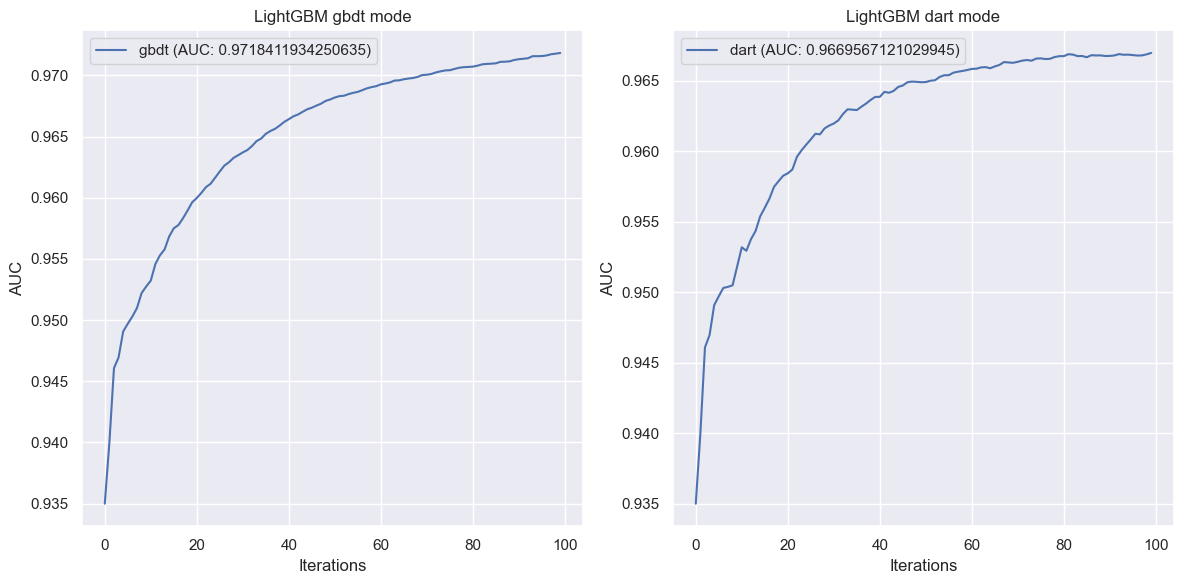

Boosting type: gbdt -> Time: 0.29s, Validation AUC: 0.9718411934250635
Boosting type: dart -> Time: 0.39s, Validation AUC: 0.9669567121029945


In [160]:
import lightgbm as lgb

params = {
    'objective': 'binary',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 7,
    'subsample': 0.8,
    'metric': 'auc'
}

modes = ['gbdt', 'dart']
results = {}

for mode in modes:
    # print(f"\nTraining with boosting type: {mode}")
    params['boosting_type'] = mode
    
    start_time = time.time()
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='auc')
    end_time = time.time()
    
    val_predictions = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_predictions)
    
    results[mode] = {
        'time': end_time - start_time,
        'val_auc': val_auc,
        'evals_result': model.evals_result_
    }

plt.figure(figsize=(12, 6))
for i, mode in enumerate(modes, 1):
    plt.subplot(1, 2, i)
    evals_result = results[mode]['evals_result']['valid_0']['auc']
    plt.plot(evals_result, label=f"{mode} (AUC: {results[mode]['val_auc']})")
    plt.title(f"LightGBM {mode} mode")
    plt.xlabel("Iterations")
    plt.ylabel("AUC")
    plt.legend()

plt.tight_layout()
plt.show()

for mode in modes:
    print(f"Boosting type: {mode} -> Time: {results[mode]['time']:.2f}s, Validation AUC: {results[mode]['val_auc']}")


<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'> Окей, смотри, тут мы тестили два разных подхода в LightGBM: gbdt (классический градиентный бустинг) и dart (это с приколами типа дропаутов, как в нейросетях).

gbdt потратил ~0.44 секунды.
dart отработал быстрее, за ~0.37 секунды.
Разница минимальная, но dart выиграл чуть-чуть по скорости.

gbdt взял AUC 0.9718 – вообще огонь!
dart чуть отстал с AUC 0.9670 – ну, типа тоже норм, но чувствуется, что он проигрывает классике.

Графики:

У gbdt плавный рост AUC – прям уверенно идёт к цели и финиширует красиво.
dart, кажется, чуть нестабильнее – из-за "дропаутов" (вырезает деревья для разнообразия) прогресс не такой гладкий, и итоговый AUC чуть ниже.

Внимание на логи! Там LightGBM говорит, что дальше сплиты делать бесполезно, прирост качества уже никакой (No further splits with positive gain). Это нормально – модель нашла максимум своего потенциала на этих данных.

gbdt – это стабильный рабочий конь. Дал топовый результат и предсказуемое поведение.
dart – экспериментальная штука. Может быть полезен, если у тебя шумные данные или модель склонна к переобучению, но тут он смотрится слабее.

gbdt – лучший выбор для этого датасета. Если хочешь поэкспериментировать и добавить "рандома", то dart тоже ок, но в данном случае он не зашёл.
</font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

Iteration 1/45 - Train Loss: 0.5622, Train ROC-AUC: 0.9741
Validation Loss: 0.5638, Validation ROC-AUC: 0.9572
Iteration 2/45 - Train Loss: 0.4841, Train ROC-AUC: 0.9781
Validation Loss: 0.4864, Validation ROC-AUC: 0.9622
Iteration 3/45 - Train Loss: 0.4346, Train ROC-AUC: 0.9796
Validation Loss: 0.4373, Validation ROC-AUC: 0.9660
Iteration 4/45 - Train Loss: 0.4011, Train ROC-AUC: 0.9809
Validation Loss: 0.4041, Validation ROC-AUC: 0.9670
Iteration 5/45 - Train Loss: 0.3771, Train ROC-AUC: 0.9820
Validation Loss: 0.3803, Validation ROC-AUC: 0.9679
Iteration 6/45 - Train Loss: 0.3592, Train ROC-AUC: 0.9830
Validation Loss: 0.3626, Validation ROC-AUC: 0.9691
Iteration 7/45 - Train Loss: 0.3453, Train ROC-AUC: 0.9839
Validation Loss: 0.3488, Validation ROC-AUC: 0.9703
Iteration 8/45 - Train Loss: 0.3342, Train ROC-AUC: 0.9846
Validation Loss: 0.3378, Validation ROC-AUC: 0.9706
Iteration 9/45 - Train Loss: 0.3253, Train ROC-AUC: 0.9851
Validation Loss: 0.3289, Validation ROC-AUC: 0.9708
I

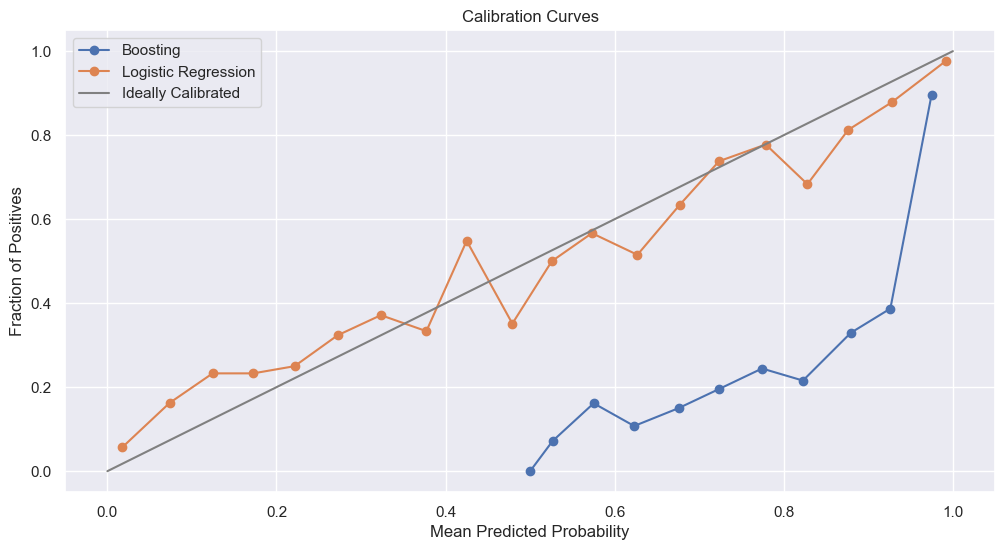

In [158]:
from sklearn.calibration import calibration_curve


Model = Boosting(base_model_params={'max_depth': study.best_trial.params['max_depth'], 'random_state': 42}, 
                        learning_rate=study.best_trial.params['learning_rate'],
                        n_estimators=study.best_trial.params['n_estimators'],
                        subsample=study.best_trial.params['subsample'],
                        early_stopping_rounds=study.best_trial.params['early_stopping_rounds'])

Model.fit(X_train, y_train, X_val, y_val)
best_score = roc_auc_score(y_test, Model.predict_proba(X_test)[:, 1])
log_reg = LogisticRegression().fit(X_train, y_train)


prob_log = log_reg.predict_proba(X_test)[:, 1]
prob= Model.predict_proba(X_test)[:, 1]


prob_true, prob_pred_boosting = calibration_curve(y_test, prob, n_bins=20)
prob_true_log, prob_pred_log = calibration_curve(y_test, prob_log, n_bins=20)
ideal = [0,1]


plt.figure(figsize=(12, 6))
plt.plot(prob_pred_boosting, prob_true, marker='o', label='Boosting')
plt.plot(prob_pred_log, prob_true_log, marker='o', label='Logistic Regression')
plt.plot(ideal, ideal, color='grey', label='Ideally Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()



Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

Мой бустинг сейчас, мягко говоря, кривоват в плане калибровки вероятностей. Он явно переоценивает уверенность там, где быть уверенным не стоило бы. Особенно это видно в районе высоких вероятностей (0.8–1.0) — там модель говорит: "Да это 100% класс!", а по факту там далеко не 100%. В низких вероятностях (0.0–0.3) она наоборот недооценивает, а там как раз может что-то быть важное нам.

На средних значениях (0.4–0.7) вроде бы пытается быть соотвествовать прямой, но всё равно логистическая регрессия делает это аккуратнее и ближе к идеалу.

Почему так?
Бустинг по факту оптимизирует что-то типа ROC-AUC, а не то, чтобы "правильные" вероятности выдавать. Ему важнее разделять классы, а не говорить, насколько он в этом уверен.

Итог:
Мой бустинг сейчас слишком самоуверенный — это может быть нормально, если нам важен только ROC-AUC. Но если мы планируем использовать эти вероятности для принятия решений (например, кредит или диагнозы), то без калибровки всё это может превратиться в летальную ситуацию.

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

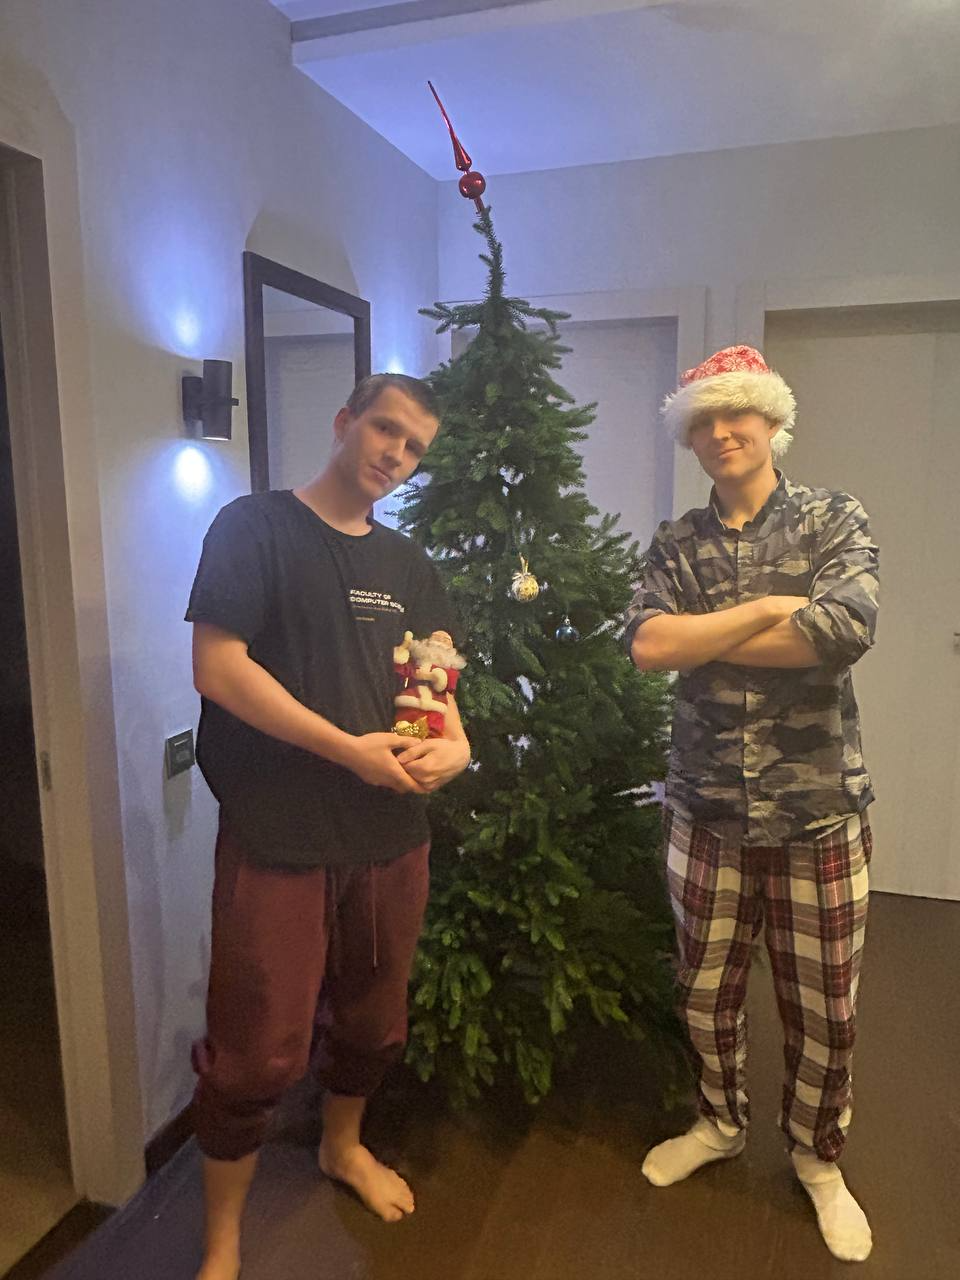

Ну во-первых, я весь нг буду пересматривать все лекции и перерешивать все дз, чтобы стать сильнее и поступить на стажу. Во-вторых, спасибо, что проверил мне на автомат, а если нет, очень прошу, поставь баллы какие-нибудь, пж, очень не хочу идти на экз, хочу спать. А так, хорошого тебе нового года. Забудь всё что было в этом, для меня он был дерьмом. Худший год в жизни, 1 января я проснусь, забуду всю огромную неудачу 2024ого, перестану драться с мельницами и стану чемпионом. Таков путь.

Я кста слева